In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import itertools

import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [2]:
df = pd.read_csv('./heart.csv')
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [4]:
df[df.duplicated()]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [5]:
df.drop_duplicates(keep='first', inplace=True)
df[df.duplicated()]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output


In [6]:
df.reset_index(drop=True)
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [7]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
df_corr_mat = df.corr()
px.imshow(df_corr_mat)


In [9]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [10]:
X

array([[63.,  1.,  3., ...,  0.,  0.,  1.],
       [37.,  1.,  2., ...,  0.,  0.,  2.],
       [41.,  0.,  1., ...,  2.,  0.,  2.],
       ...,
       [68.,  1.,  0., ...,  1.,  2.,  3.],
       [57.,  1.,  0., ...,  1.,  1.,  3.],
       [57.,  0.,  1., ...,  1.,  1.,  2.]])

In [11]:
list(y)

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
print(X_train.shape)
print(X_test.shape)

(241, 13)
(61, 13)


In [14]:
print(y_train.shape)
print(y_test.shape)

(241,)
(61,)


In [15]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [16]:
def get_models(num_layers: int,
               min_nodes_per_layer: int,
               max_nodes_per_layer: int,
               node_step_size: int,
               input_shape: tuple,
               hidden_layer_activation: str = 'relu',
               num_nodes_at_output: int = 1,
               output_layer_activation: str = 'sigmoid') -> list:
  
  node_options = list(range(min_nodes_per_layer, max_nodes_per_layer + 1, node_step_size))
  layer_possibilities = [node_options] * num_layers
  layer_node_permutations = list(itertools.product(*layer_possibilities))
  
  models = []
  for permutation in layer_node_permutations:
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.InputLayer(input_shape=input_shape))
    model_name = ''

    for nodes_at_layer in permutation:
      model.add(tf.keras.layers.Dense(nodes_at_layer, activation=hidden_layer_activation))
      model_name += f'dense{nodes_at_layer}_'

    model.add(tf.keras.layers.Dense(num_nodes_at_output, activation=output_layer_activation))
    model._name = model_name[:-1]
    models.append(model)
      
  return models

In [17]:
all_models = get_models(
    num_layers=3, 
    min_nodes_per_layer=16, 
    max_nodes_per_layer=256, 
    node_step_size=16, 
    input_shape=(13,),
    hidden_layer_activation='LeakyReLU'
)

In [18]:
all_models[0].save(os.path.join('.', 'models', 'test.h5'))

In [19]:
def optimize(models: list,
            X_train: np.array,
            y_train: np.array,
            X_test: np.array,
            y_test: np.array,
            epochs: int = 50,
            verbose: int = 0) -> pd.DataFrame:
  
  # We'll store the results here
  results = []
  
  def train(model: tf.keras.Sequential) -> dict:
    # Change this however you want 
    # We're not optimizing this part today
    model.compile(
      loss=tf.keras.losses.binary_crossentropy,
      optimizer=tf.keras.optimizers.Adam(),
      metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy')
      ]
    )
    
    # Train the model
    model.fit(
      X_train,
      y_train,
      epochs=epochs,
      verbose=verbose
    )
    
    # Make predictions on the test set
    preds = model.predict(X_test)
    prediction_classes = [1 if prob > 0.5 else 0 for prob in np.ravel(preds)]
    
    # Return evaluation metrics on the test set
    return {
      'model_name': model.name,
      'test_accuracy': accuracy_score(y_test, prediction_classes),
      'test_precision': precision_score(y_test, prediction_classes),
      'test_recall': recall_score(y_test, prediction_classes),
      'test_f1': f1_score(y_test, prediction_classes)
    }
  
  # Train every model and save results
  index = 0
  for model in models:
    try:
      print(model.name, end=' ... ')
      res = train(model=model)
      results.append(res)
      model.save(os.path.join('.', 'models', f'{index}_{model.name}.h5'))
    except Exception as e:
      print(f'{model.name} --> {str(e)}')
    index += 1
      
  return pd.DataFrame(results)

In [20]:
optimization_results = optimize(
    models=all_models,
    X_train=X_train_scaled,
    y_train=y_train,
    X_test=X_test_scaled,
    y_test=y_test
)

2/2 [==============================] - 0s 2ms/step
dense16_dense16_dense80 ... WARNING:tensorflow:5 out of the last 9 calls to <function Model.make_predict_function.<locals>.predict_function at 0x000002EC299FF1F0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
2/2 [==============================] - 0s 2ms/step
dense16_dense16_dense96 ... WARNING:tensorflow:6 out of the last 11 calls to <function Model.make_predict_function.<locals>.predict_function at 0x000002EC29DD84C0> trig

In [21]:
test = tf.keras.models.load_model(os.path.join('.', 'models', '0_dense16_dense16_dense16.h5'))
test_pred = test.predict(X_test)
test_prediction_classes = [1 if prob > 0.5 else 0 for prob in np.ravel(test_pred)]

curr_pred = all_models[0].predict(X_test)
curr_prediction_classes = [1 if prob > 0.5 else 0 for prob in np.ravel(curr_pred)]
print(precision_score(y_test, test_prediction_classes))
print(precision_score(y_test, curr_prediction_classes))

2/2 [==============================] - 0s 2ms/step
0.75
0.75


In [22]:
type(optimization_results)

pandas.core.frame.DataFrame

In [23]:
optimization_results.sort_values(by='test_precision', ascending=False)

,model_name,test_accuracy,test_precision,test_recall,test_f1
88,dense16_dense96_dense144,0.885246,0.962963,0.81250,0.881356
190,dense16_dense192_dense240,0.868852,0.961538,0.78125,0.862069
3796,dense240_dense224_dense80,0.868852,0.961538,0.78125,0.862069
3294,dense208_dense224_dense240,0.868852,0.961538,0.78125,0.862069
59,dense16_dense64_dense192,0.852459,0.960000,0.75000,0.842105
...,...,...,...,...,...
299,dense32_dense48_dense192,0.803279,0.812500,0.81250,0.812500
1276,dense80_dense256_dense208,0.803279,0.812500,0.81250,0.812500
207,dense16_dense208_dense256,0.786885,0.806452,0.78125,0.793651
244,dense16_dense256_dense80,0.786885,0.806452,0.78125,0.793651


In [24]:
optimization_results_precision = optimization_results.sort_values(by='test_precision', ascending=False)
optimization_results_precision = optimization_results_precision.reset_index()
optimization_results_precision

,index,model_name,test_accuracy,test_precision,test_recall,test_f1
0,88,dense16_dense96_dense144,0.885246,0.962963,0.81250,0.881356
1,190,dense16_dense192_dense240,0.868852,0.961538,0.78125,0.862069
2,3796,dense240_dense224_dense80,0.868852,0.961538,0.78125,0.862069
3,3294,dense208_dense224_dense240,0.868852,0.961538,0.78125,0.862069
4,59,dense16_dense64_dense192,0.852459,0.960000,0.75000,0.842105
...,...,...,...,...,...,...
4091,299,dense32_dense48_dense192,0.803279,0.812500,0.81250,0.812500
4092,1276,dense80_dense256_dense208,0.803279,0.812500,0.81250,0.812500
4093,207,dense16_dense208_dense256,0.786885,0.806452,0.78125,0.793651
4094,244,dense16_dense256_dense80,0.786885,0.806452,0.78125,0.793651


In [25]:
optimization_results_recall = optimization_results.sort_values(by='test_recall', ascending=False)
optimization_results_recall = optimization_results_recall.reset_index()
optimization_results_recall

,index,model_name,test_accuracy,test_precision,test_recall,test_f1
0,2505,dense160_dense208_dense160,0.885246,0.878788,0.90625,0.892308
1,8,dense16_dense16_dense144,0.901639,0.906250,0.90625,0.906250
2,161,dense16_dense176_dense32,0.868852,0.875000,0.87500,0.875000
3,439,dense32_dense192_dense128,0.885246,0.903226,0.87500,0.888889
4,130,dense16_dense144_dense48,0.885246,0.903226,0.87500,0.888889
...,...,...,...,...,...,...
4091,170,dense16_dense176_dense176,0.786885,0.851852,0.71875,0.779661
4092,782,dense64_dense16_dense240,0.803279,0.884615,0.71875,0.793103
4093,121,dense16_dense128_dense160,0.819672,0.920000,0.71875,0.807018
4094,2008,dense128_dense224_dense144,0.836066,0.958333,0.71875,0.821429


In [26]:
optimization_results_accuracy = optimization_results.sort_values(by='test_accuracy', ascending=False)
optimization_results_accuracy = optimization_results_accuracy.reset_index(drop=True)
optimization_results_accuracy

,model_name,test_accuracy,test_precision,test_recall,test_f1
0,dense32_dense128_dense112,0.901639,0.933333,0.87500,0.903226
1,dense16_dense32_dense160,0.901639,0.933333,0.87500,0.903226
2,dense32_dense192_dense224,0.901639,0.933333,0.87500,0.903226
3,dense32_dense48_dense32,0.901639,0.933333,0.87500,0.903226
4,dense16_dense144_dense128,0.901639,0.933333,0.87500,0.903226
...,...,...,...,...,...
4091,dense48_dense176_dense208,0.786885,0.806452,0.78125,0.793651
4092,dense32_dense160_dense224,0.786885,0.827586,0.75000,0.786885
4093,dense16_dense256_dense80,0.786885,0.806452,0.78125,0.793651
4094,dense16_dense176_dense176,0.786885,0.851852,0.71875,0.779661


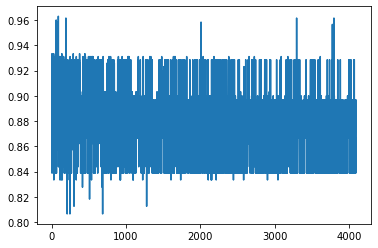

In [27]:
plt.plot(optimization_results['test_precision'][:])
plt.show()

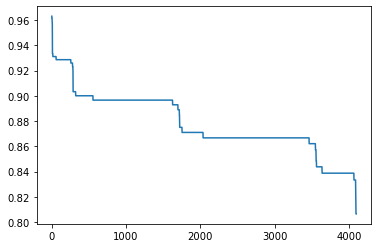

(4096,)


In [28]:
plt.plot(optimization_results_precision['test_precision'])
plt.show()

print(optimization_results_precision['test_precision'].shape)

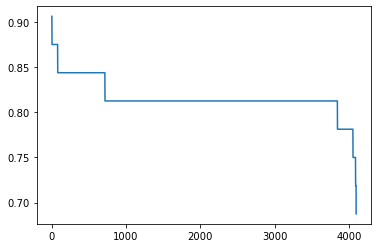

In [29]:
plt.plot(optimization_results_recall['test_recall'])
plt.show()